In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Train_Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,0
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,0


In [3]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


""


## **Checking null values**

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churned             0
dtype: int64

## **Checking duplicates values**

In [5]:
df.duplicated().sum()

0

## **Changing data type from object to float type**

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(dtype='float64')

In [7]:
df['TotalCharges'].isnull().sum()

8

There might be some values that cannot be turned in float value, so it converted it into null value.

In [8]:
df.dropna(inplace=True) # droping values because only 8 values were null

In [9]:
df['TotalCharges'].isnull().sum()

0

## **These columns have more than two values**

In [10]:
lst =['MultipleLines',	'InternetService', 	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	
      'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract', 'PaymentMethod']

In [11]:
lst_3 = df[lst]

In [12]:
from sklearn.preprocessing import LabelEncoder
for col in lst:
    lst_3[col] = LabelEncoder().fit_transform(df[col])


**Using LabelEncoder, I converted it into numerical columns**

In [13]:
lst_3.head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,1,0,0,0,2,0,2,2,0,2
1,0,1,2,0,0,0,0,0,0,3
2,1,0,2,2,0,2,0,0,2,3
3,0,0,0,2,2,0,2,2,2,1
4,0,0,0,0,0,0,0,0,0,2


## **These columns have only two values**

In [14]:
val_2 = ['gender', 'Partner',	'Dependents', 'PhoneService', 'PaperlessBilling']

In [15]:
#Encode categorical variables
df_encoded = pd.get_dummies(df[val_2], drop_first=True)

In [16]:
for i in df_encoded.columns:
    df_encoded[i] = df_encoded[i].apply(lambda x:1 if x else 0)
df_encoded.columns = val_2

**Using Lambda function, Assining value 1 to True and 0 to False**

In [17]:
df_encoded.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling
0,1,0,0,0,0
1,1,1,1,1,0
2,1,1,1,0,0
3,0,1,0,1,1
4,1,1,1,1,0


## **These columns have very large values**
- Using StandardScaler, mapping values in range -3 to +3 assuming normal distribution

In [18]:
from sklearn.preprocessing import StandardScaler
num_col = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

sl = StandardScaler().fit_transform(num_col)
num_df = pd.DataFrame(sl, columns=['tenure', 'MonthlyCharges', 'TotalCharges'], index=df.index)
num_df.head()

,tenure,MonthlyCharges,TotalCharges
0,0.100545,-0.523075,-0.263695
1,-0.714005,0.336396,-0.505076
2,-0.795460,-0.810119,-0.751328
3,-0.266003,0.283301,-0.174159
4,-1.284190,-0.677382,-0.990822


## **Concatenating all vlaues**

In [19]:
x_col = pd.concat([lst_3, df_encoded, df['SeniorCitizen'], num_df], axis=1)
x_col

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,gender,Partner,Dependents,PhoneService,PaperlessBilling,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,0,2,0,2,2,0,2,1,0,0,0,0,0,0.100545,-0.523075,-0.263695
1,0,1,2,0,0,0,0,0,0,3,1,1,1,1,0,0,-0.714005,0.336396,-0.505076
2,1,0,2,2,0,2,0,0,2,3,1,1,1,0,0,0,-0.795460,-0.810119,-0.751328
3,0,0,0,2,2,0,2,2,2,1,0,1,0,1,1,0,-0.266003,0.283301,-0.174159
4,0,0,0,0,0,0,0,0,0,2,1,1,1,1,0,0,-1.284190,-0.677382,-0.990822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,2,1,0,2,2,2,2,2,2,2,0,1,0,1,0,0,1.566734,1.469636,2.371727
5630,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,-1.243462,-0.627605,-0.975113
5631,2,1,2,2,0,0,2,2,0,3,0,0,0,1,1,1,-0.306730,1.255598,0.156911
5632,0,2,1,1,1,1,1,1,1,1,0,1,0,1,0,0,-0.347458,-1.478780,-0.798520


In [20]:
# calculating correlation based on "Pearson correlation"
corr = x_col.corr()

## **Plotting heatmap to see correlation**

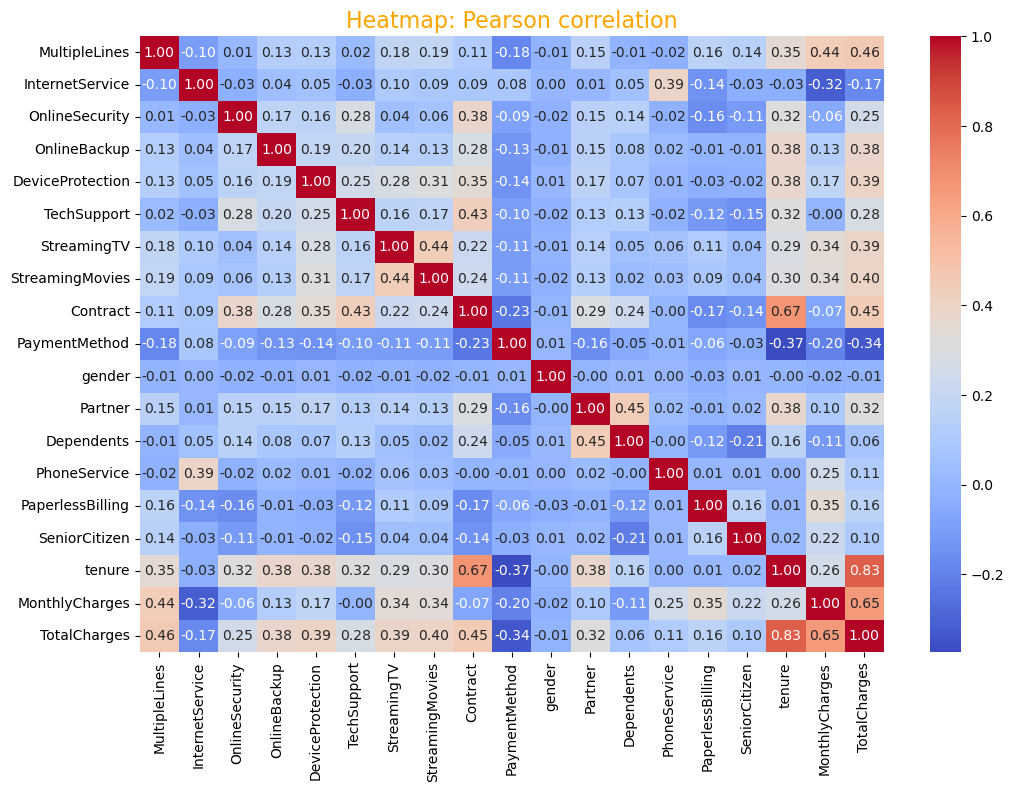

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap: Pearson correlation', color='Orange', fontsize=16)
plt.show()

# Using Random undersampling to remove bias

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rx, ry = RandomUnderSampler().fit_resample(x_col, df['churned'])
print(rx)

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2862              0                1               0             2   
3992              2                1               0             2   
5062              0                1               0             2   
348               2                2               1             1   
3207              1                0               0             0   
...             ...              ...             ...           ...   
5623              2                1               0             2   
5625              1                0               2             0   
5628              1                0               0             2   
5630              0                0               0             0   
5631              2                1               2             2   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
2862                 2            0            2                2         2   
3

In [23]:
ry.value_counts()

churned
0    1495
1    1495
Name: count, dtype: int64

# IMPORT TEST DATASET

In [24]:
data = pd.read_csv('../data/Test_Data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.2
1,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55
2,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.2
3,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75
4,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35


# CLEANING TEST DATASET

In [25]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').astype(dtype='float64')

In [26]:
data['TotalCharges'].isnull().sum()

3

In [27]:
data.dropna(inplace=True) # droping values because only 8 values were null

In [28]:
k =['MultipleLines',	'InternetService', 	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	
      'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract', 'PaymentMethod']

In [29]:
lst_4 = data[k]

In [30]:
from sklearn.preprocessing import LabelEncoder
for col in k:
    lst_4[col] = LabelEncoder().fit_transform(data[col])

In [31]:
val_3 = ['gender', 'Partner',	'Dependents', 'PhoneService', 'PaperlessBilling']

In [32]:
#Encode categorical variables
data_encoded = pd.get_dummies(data[val_3], drop_first=True)

In [33]:
for i in data_encoded.columns:
    data_encoded[i] = data_encoded[i].apply(lambda x:1 if x else 0)
data_encoded.columns = val_3

In [34]:
from sklearn.preprocessing import StandardScaler
num_col = data[['tenure', 'MonthlyCharges', 'TotalCharges']]

sl = StandardScaler().fit_transform(num_col)
num_data = pd.DataFrame(sl, columns=['tenure', 'MonthlyCharges', 'TotalCharges'], index=data.index)

In [35]:
x_test_col = pd.concat([lst_4, data_encoded, data['SeniorCitizen'], num_data], axis=1)
x_test_col

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,gender,Partner,Dependents,PhoneService,PaperlessBilling,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,0,1.633397,1.670925,2.827435
1,2,1,0,0,0,2,2,2,0,1,0,0,0,1,1,1,-0.978970,1.205573,-0.585841
2,2,0,2,2,2,0,2,0,1,1,0,1,1,1,1,0,0.368032,0.475741,0.453834
3,0,1,0,0,2,2,0,0,0,2,1,1,0,1,0,0,-0.570788,0.470719,-0.332904
4,2,0,2,2,2,0,2,2,2,1,0,1,0,1,1,0,1.633397,0.619699,1.676598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,2,2,2,2,2,2,1,3,0,1,1,1,1,0,0.694578,0.772026,0.965759
1405,0,2,1,1,1,1,1,1,2,1,1,1,1,1,1,0,-0.162605,-1.467690,-0.775747
1406,0,2,1,1,1,1,1,1,0,0,1,0,0,1,0,0,-1.101425,-1.455972,-0.953824
1407,0,2,1,1,1,1,1,1,2,0,0,0,0,1,0,0,0.980305,-1.487777,-0.521117


# LOGISTIC REGRESSION MODEL

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
log_model = LogisticRegression()
log_model.fit(x_col,df['churned'])

y_pred_log = log_model.predict(x_col)

print("🔹 Logistic Regression Accuracy:", accuracy_score(df['churned'], y_pred_log))
print(classification_report(df['churned'], y_pred_log))

🔹 Logistic Regression Accuracy: 0.8034127266263775
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4131
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5626
   macro avg       0.75      0.72      0.73      5626
weighted avg       0.79      0.80      0.80      5626



# RandomForest MODEL

In [37]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_col,df['churned'])

y_pred_rf = rf_model.predict(x_col)

print("Random Forest Accuracy:", accuracy_score(df['churned'], y_pred_rf))

print(classification_report(df['churned'], y_pred_rf))

Random Forest Accuracy: 0.997867045858514
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4131
           1       1.00      0.99      1.00      1495

    accuracy                           1.00      5626
   macro avg       1.00      1.00      1.00      5626
weighted avg       1.00      1.00      1.00      5626



# PREDICTING PROBABLITIES FOR ROC-AUC CURVE

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob_log = log_model.predict_proba(x_test_col)
y_prob_rf = rf_model.predict_proba(x_test_col)
y_prob_rf 

array([[0.86, 0.14],
       [0.27, 0.73],
       [0.94, 0.06],
       ...,
       [0.76, 0.24],
       [0.97, 0.03],
       [1.  , 0.  ]])

# Important Coefficients from Logistic Regression Model

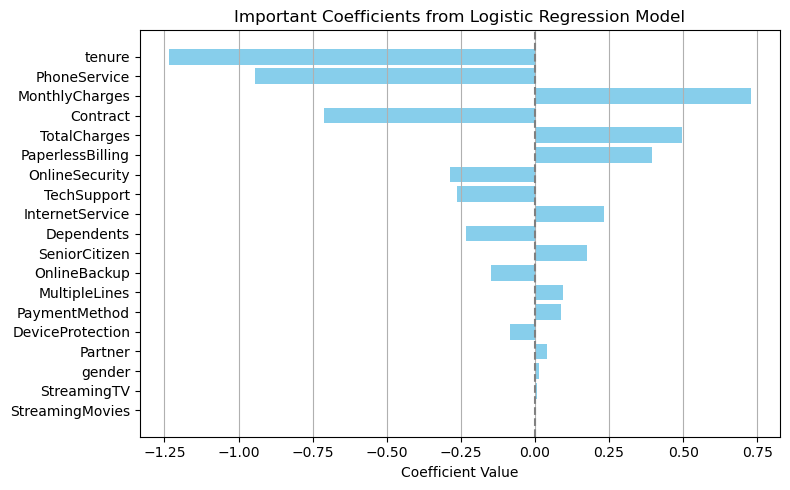

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming this is your trained model and feature set
# log_model = LogisticRegression().fit(X_train, y_train)
# X = your input features (DataFrame)

# Get feature names and coefficients
feature_names = x_col.columns
coefficients = log_model.coef_[0]  # Coefficients for the positive class

# Create a DataFrame for easier plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
})

# Sort by absolute value of coefficients
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Coefficient Value')
plt.title('Important Coefficients from Logistic Regression Model')
plt.gca().invert_yaxis()  # Most important on top
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()